In [172]:
N, L = 50, 100
Iter = 10000
dd1, dd2 = 0.9, 0.9
# 初期化
D = np.random.randn(N, L)
# 列の正規化
D = np.dot(D, np.diag(np.diag(1./np.sqrt(np.dot(D.T, D)))))
# グラム行列
G = np.dot(D.T, D)
# とりうる相互コヒーレンスの最小値
mu = np.sqrt(float(L - N) / N / (L - 1))
log = []
for k in xrange(Iter):
    # 大きい内積を縮小
    gg = np.sort(np.abs(G.flatten()))
    th = gg[np.round(dd1 * (L * L - L)).astype(np.int)]
    pos = (th < np.abs(G)) * (np.abs(G) < 0.999) 
    G[pos] *= dd2
    # ランクをNに減らす
    U, S, V = np.linalg.svd(G)
    S[N:] = 0
    S = np.diag(S)
    G = np.dot(U, np.dot(S, V))
    # 列を正規化
    n = np.diag(1. / np.sqrt(np.diag(G)))
    G = np.dot(n, np.dot(G, n))
    # 統計量を表示
    gg = np.sort(np.abs(G.flatten()))
    th = gg[np.round(dd1 * (L * L - L)).astype(np.int)]
    pos = (th < np.abs(G)) * (np.abs(G) < 0.999)
    print k, mu, np.mean(np.abs(G[pos])), max(np.abs(G[pos]))
    log.append([k, mu, np.mean(np.abs(G[pos])), max(np.abs(G[pos]))])
U, S, V = np.linalg.svd(G)
S = np.diag(S)
D_Grassmannian = np.dot(np.sqrt(S[:N, :N]), U[:N, :])

0 0.100503781526 0.272494093974 0.444851267203
1 0.100503781526 0.258916757604 0.422688594001
2 0.100503781526 0.246915856495 0.403212761784
3 0.100503781526 0.236320262554 0.386328382021
4 0.100503781526 0.226984097428 0.366360971127
5 0.100503781526 0.21924840692 0.348047161197
6 0.100503781526 0.21215713276 0.328180605104
7 0.100503781526 0.206465176359 0.31069081003
8 0.100503781526 0.201379548359 0.294370698045
9 0.100503781526 0.197098074605 0.277667068381
10 0.100503781526 0.193251047236 0.261225993471
11 0.100503781526 0.190032173587 0.244715325382
12 0.100503781526 0.187357021386 0.230694455573
13 0.100503781526 0.184608585662 0.218817332843
14 0.100503781526 0.182127905271 0.211555399857
15 0.100503781526 0.179907250763 0.203014610868
16 0.100503781526 0.178065709785 0.192613631403
17 0.100503781526 0.176047108608 0.18444222436
18 0.100503781526 0.174319950265 0.182537704575
19 0.100503781526 0.172781391237 0.179793847052
20 0.100503781526 0.171468939615 0.178707353122
21 0.1

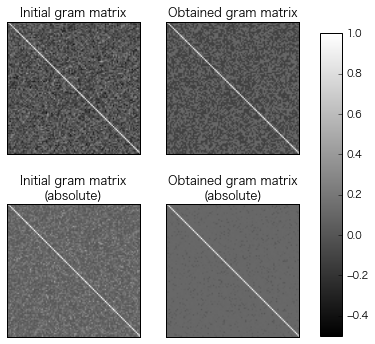

In [175]:
G2 = np.dot(D.T, D)
titles = ['Initial gram matrix', 'Obtained gram matrix', 
          'Initial gram matrix\n(absolute)', 'Obtained gram matrix\n(absolute)']

fig, ax = plt.subplots(2, 2, figsize=(6, 6))
plt.gray()
ax = ax.flatten()
for i, mat in enumerate([G2, G, np.abs(G2), np.abs(G)]):
    im = ax[i].imshow(mat, vmin=-0.5, vmax=1)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(titles[i])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.savefig('Grassmannian.png', dpi=220)

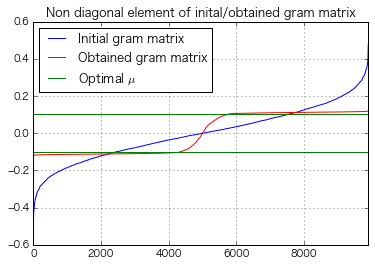

In [213]:
gg = np.sort(G.flatten()).flatten()
gg2 = np.sort(G2.flatten()).flatten()

plt.title('Non diagonal element of inital/obtained gram matrix')
plt.plot(gg2[:-100], label='Initial gram matrix', color='blue')
plt.plot(gg[:-100], label='Obtained gram matrix', color='red')
plt.plot([mu] * 9900, label='Optimal $\mu$', color='green')
plt.axhline(-mu, 0, 9900, color='green')
plt.xlim(0, 9900)
plt.grid()
plt.legend(loc='upper left')
plt.savefig('NonDiagonalElement.png', dpi=220)

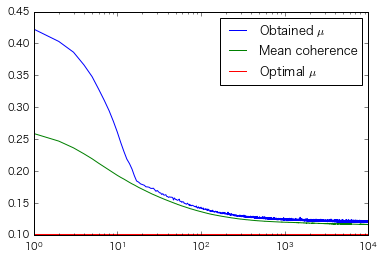

In [246]:
log = np.array(log)
plt.semilogx(log[:, 3], label='Obtained $\mu$')
plt.semilogx(log[:, 2], label='Mean coherence')
plt.semilogx(log[:, 1], label='Optimal $\mu$')
plt.legend(loc='upper right')
plt.savefig('CoherenceIteration.png', dpi=220)

In [231]:
plt.semilogx?